<a href="https://colab.research.google.com/github/shin-ta/Python-study/blob/main/CIFAR10_3layers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# TensorFlow and tf.keras
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.15.0


In [2]:
cifar10 = tf.keras.datasets.cifar10

(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 4s 0us/step


In [3]:
X_train.shape

(50000, 32, 32, 3)

In [4]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', ' truck']

In [5]:
X_train = X_train / 255.0
X_test = X_test / 255.0

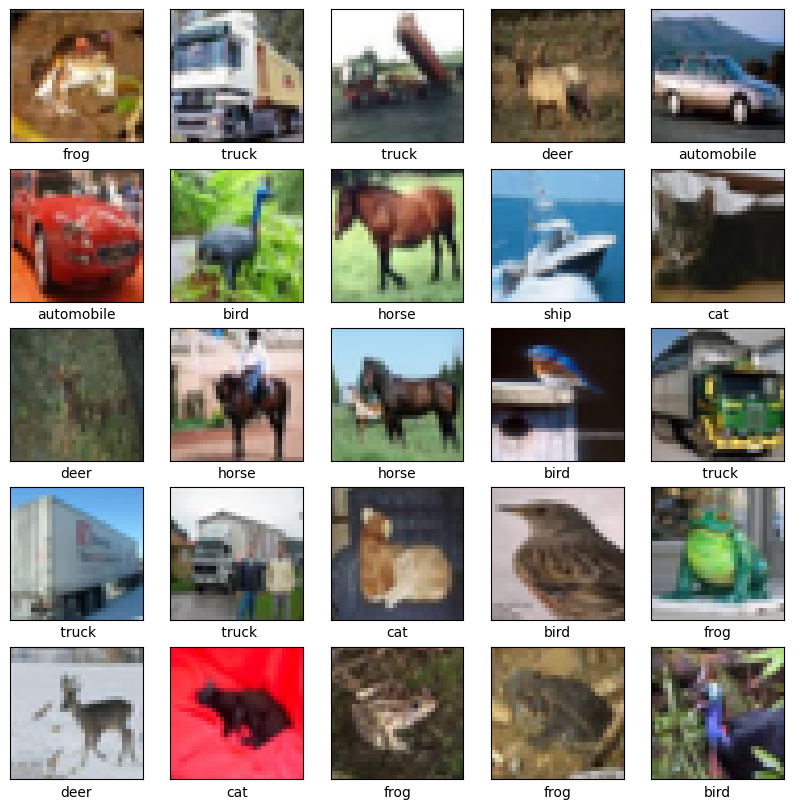

In [6]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i][0]])
plt.show()

In [7]:
# ラベルデータをONE-HOTエンコードする
# y_train = tf.keras.utils.to_categorical(y_train)
# y_test = tf.keras.utils.to_categorical(y_test)

In [8]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(32, 32, 3)))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [9]:
model.compile(optimizer='sgd',
              loss="sparse_categorical_crossentropy",
              metrics=['accuracy'])

In [10]:
history = model.fit(
    X_train,
    y_train,
    batch_size=128,
    epochs=10,
    verbose=1,
    validation_split=0.1)

Epoch 1/10
352/352 [==============================] - 6s 16ms/step - loss: 1.9905 - accuracy: 0.2906 - val_loss: 1.8929 - val_accuracy: 0.3288
Epoch 2/10
352/352 [==============================] - 4s 11ms/step - loss: 1.8428 - accuracy: 0.3527 - val_loss: 1.8516 - val_accuracy: 0.3430
Epoch 3/10
352/352 [==============================] - 4s 11ms/step - loss: 1.7853 - accuracy: 0.3745 - val_loss: 1.7939 - val_accuracy: 0.3654
Epoch 4/10
352/352 [==============================] - 5s 15ms/step - loss: 1.7446 - accuracy: 0.3917 - val_loss: 1.7645 - val_accuracy: 0.3820
Epoch 5/10
352/352 [==============================] - 4s 11ms/step - loss: 1.7122 - accuracy: 0.4041 - val_loss: 1.7331 - val_accuracy: 0.3856
Epoch 6/10
352/352 [==============================] - 4s 11ms/step - loss: 1.6829 - accuracy: 0.4149 - val_loss: 1.7128 - val_accuracy: 0.4048
Epoch 7/10
352/352 [==============================] - 5s 14ms/step - loss: 1.6586 - accuracy: 0.4234 - val_loss: 1.6939 - val_accuracy: 0.4152

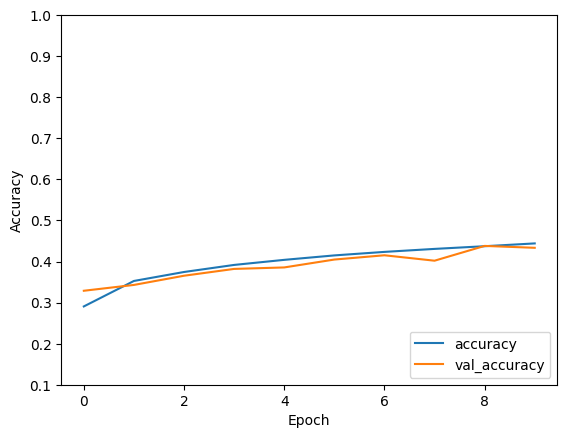

In [11]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.1, 1])
plt.legend(loc='lower right')

In [12]:
test_loss, test_acc = model.evaluate(X_test,  y_test, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 1.6073 - accuracy: 0.4351 - 770ms/epoch - 2ms/step

Test accuracy: 0.4350999891757965


In [ ]:
probability_model = tf.keras.Sequential([model,
                                         tf.keras.layers.Softmax()])

In [ ]:
predictions = probability_model.predict(X_test)

313/313 [==============================] - 1s 2ms/step


In [ ]:
predictions[0]

array([2.8952693e-06, 3.1493176e-11, 1.6283800e-09, 6.7392947e-10,
       2.2541347e-08, 1.1544737e-03, 3.2197127e-07, 1.0411997e-02,
       1.5335208e-07, 9.8843014e-01], dtype=float32)

In [ ]:
np.argmax(predictions[0])

9

In [ ]:
y_test[0]

9

In [ ]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

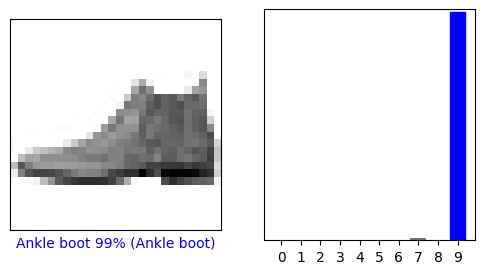

In [ ]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], y_test, X_test)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  y_test)
plt.show()

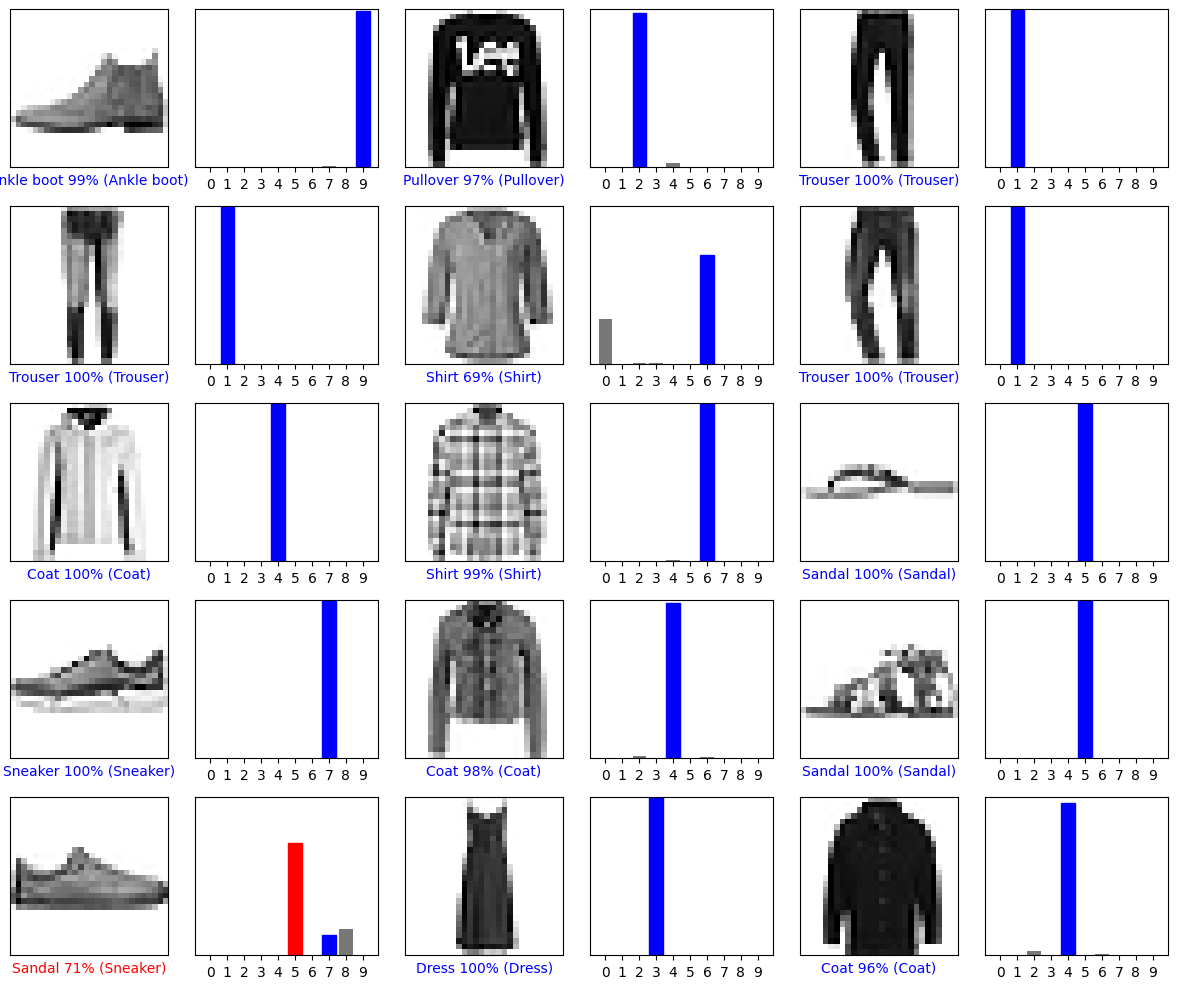

In [ ]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], y_test, X_test)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], y_test)
plt.tight_layout()
plt.show()

In [ ]:
# Grab an image from the test dataset.
img = X_test[1]

print(img.shape)

(28, 28)


In [ ]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [ ]:
predictions_single = probability_model.predict(img)

print(predictions_single)

1/1 [==============================] - 0s 37ms/step
[[1.2019592e-05 4.8758991e-14 9.9906510e-01 1.3058071e-09 5.2093476e-04
  3.9545195e-13 4.0190198e-04 1.7785816e-23 7.9089152e-11 1.7891636e-15]]


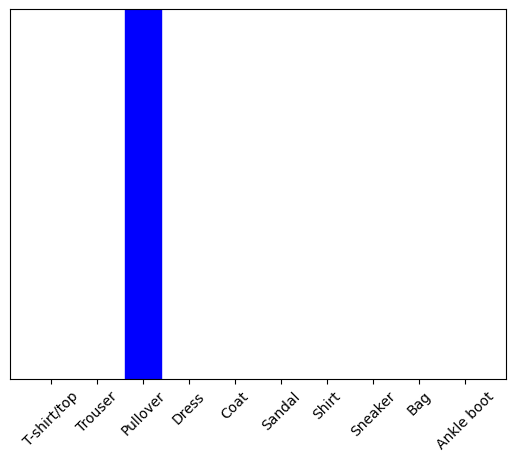

In [ ]:
plot_value_array(1, predictions_single[0], y_test)
_ = plt.xticks(range(10), class_names, rotation=45)
plt.show()

In [ ]:
np.argmax(predictions_single[0])

2